In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [4]:
cftc=pd.read_csv('CFTC_CU.csv')
cftc['update_date']=pd.to_datetime(cftc['update_date'])

In [7]:
cu_cmx=pd.read_csv('HG1_CMX.csv')
cu_cmx['Date']=pd.to_datetime(cu_cmx['Date'])
cu_cmx=cu_cmx.rename(columns={'Date':'update_date'})

In [9]:
df_all=pd.merge(cu_cmx,cftc,on=['update_date'],how='left')

In [39]:
df_all['non_comm_net']=df_all['non_comm_long']-df_all['non_comm_short']
df_all['non_comm_per']=df_all['non_comm_net']/df_all['FUT_AGGTE_OPEN_INT']
df_all['non_comm_per']=df_all['non_comm_per'].fillna(method='ffill')
df_all['report_date']=df_all['update_date']+np.timedelta64(4,'D')

In [40]:
df_all

,update_date,PX_LAST,FUT_AGGTE_OPEN_INT,non_comm_long,non_comm_short,non_comm_arb,comm_long,comm_short,open interest,non_comm_net,non_comm_per,report_date
0,2017-04-17,261.00,281551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-21
1,2017-04-13,258.60,285372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-17
2,2017-04-12,254.50,288435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-16
3,2017-04-11,260.80,286852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-15
4,2017-04-10,260.40,285484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-14
5,2017-04-07,264.70,286596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-11
6,2017-04-06,265.80,284275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-10
7,2017-04-05,268.00,282208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-09
8,2017-04-04,261.20,277949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-08
9,2017-04-03,260.35,277774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-07


In [45]:
def decision(date,df):
    df=df[df['report_date']<=date]
    rg_df=df[['non_comm_net','FUT_AGGTE_OPEN_INT']]
    rg_df=rg_df.dropna(axis=0)
    X=np.array(rg_df['FUT_AGGTE_OPEN_INT'])
    X=sm.add_constant(X)
    Y=np.array(rg_df['non_comm_net'])
    lm=sm.OLS(Y,X)
    result=lm.fit()
    param=result.params
    print param

In [46]:
date=pd.to_datetime('2016-11-01')
decision(date,df_all)

[  2.94714853e+04  -2.73044743e-01]


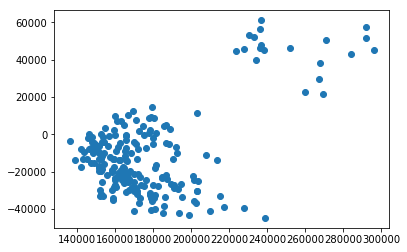

In [38]:
plt.scatter(df_all['open interest'],df_all['non_comm_net'])